In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns

In [79]:
df_seq_pathHFiltNorm = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt'
df_seq_HFiltNorm = pd.read_csv(df_seq_pathHFiltNorm, delimiter=' ')

In [80]:
df_seq_HFiltNorm.shape

(3000, 182)

In [81]:
df_seq_HFiltNormT = df_seq_HFiltNorm.T

In [82]:
df_seq_HFiltNormT.head()

,DDIT4,ANGPTL4,CALML5,KRT14,CCNB1,IGFBP3,AKR1C2,KRT6A,NDRG1,KRT4,...,MST1R,ZYG11A,NRG1,RBMS3,VCPIP1,LINC02693,OR8B9P,NEAT1,ZDHHC23,ODAD2
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,0,48,0,321,298,82,6250,634,0,0,...,78,10,136,0,0,29,0,29,0,0
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,8739,2101,55,96,1824,1938,62,0,522,413,...,279,0,264,0,134,68,0,213,0,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,13098,14032,0,0,1616,247,430,907,348,0,...,311,0,38,0,0,0,0,92,0,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2880,356,0,6211,3,3430,79,1953,592,176,...,125,0,16,0,4,1,0,1,0,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,7777,5661,4383,0,145,4618,246,85,206,0,...,268,1,25,0,0,0,0,128,0,0


In [83]:
#we now add the target variable
df_metaH_path = '../ai_lab/SmartSeq/HCC1806_SmartS_MetaData.tsv'
df_metaH = pd.read_csv(df_metaH_path, delimiter='\t')

In [84]:
def add_target_column(data, metadata_path, target_column_name, target_category):
    df_meta = pd.read_csv(metadata_path, delimiter='\t')
    df_meta.set_index('Filename', inplace=True)
    merged_transition = pd.merge(data, df_meta[target_column_name], left_index=True, right_index=True)
    dummy_variables = pd.get_dummies(merged_transition[target_column_name], prefix='category').astype('int')
    
    # Set the target category to 1 and the others to 0
    dummy_variables['Target'] = dummy_variables[target_category]
    dummy_variables.drop(columns=[col for col in dummy_variables.columns if col != 'Target'], inplace=True)
    
    merged_data = pd.concat([merged_transition, dummy_variables], axis=1)
    merged_data.drop(columns=[target_column_name], inplace=True)
    return merged_data

In [85]:
df_metaH.head()

,Filename,Cell Line,PCR Plate,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
0,output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...,HCC1806,1,A10,Normo,24,S123,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
1,output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....,HCC1806,1,A12,Normo,24,S26,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
2,output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...,HCC1806,1,A1,Hypo,24,S97,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
3,output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...,HCC1806,1,A2,Hypo,24,S104,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
4,output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...,HCC1806,1,A3,Hypo,24,S4,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


In [86]:
traindf = add_target_column(df_seq_HFiltNormT, df_metaH_path, 'Condition', 'category_Normo')

In [87]:
# SVM model to predict label
X = traindf.drop(columns=['Target'])
y = traindf['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', C=1, probability=True)

In [88]:
# Train the model using the training sets
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True)

In [89]:
# Predict the response for test dataset
y_pred = svm.predict(X_test)

In [90]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", recall_score(y_test, y_pred))
# Model F1-score: what percentage of positive tuples are labelled as such?
print("F1-score:", f1_score(y_test, y_pred))
# Model ROC-AUC: what percentage of positive tuples are labelled as such?
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC: 1.0


In [91]:
# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Initialize GridSearchCV with the SVC classifier and parameter grid
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)  # cv=5 for 5-fold cross-validation

# Perform grid search with cross-validation
grid.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid.best_params_)

# Get the best estimator
best_svm = grid.best_estimator_

# Make cross-validated predictions on the training set
cv_predictions = cross_val_predict(best_svm, X_train, y_train, cv=5)

# Evaluate accuracy of cross-validated predictions
cv_accuracy = accuracy_score(y_train, cv_predictions)
print("Cross-validated accuracy on training set:", cv_accuracy)

# Evaluate the best model on the test set
test_accuracy = best_svm.score(X_test, y_test)
print("Test accuracy:", test_accuracy)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.483 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.966 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.966 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.931 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.931 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=1, kernel=pol

In [92]:
# We understand that Best parameters are {'C': 0.01, 'gamma': 1, 'kernel': 'linear'} for the SVM model

best_svm = SVC(C=0.01, gamma=1, kernel='linear', probability=True)
# Fit the model using cross validation
best_svm.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = best_svm.predict(X_test)

In [93]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        14

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



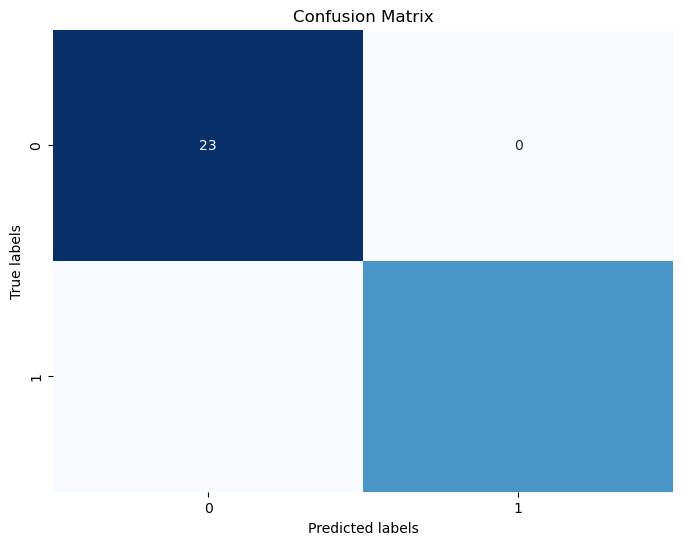

In [94]:
# Confusion matrix plot
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

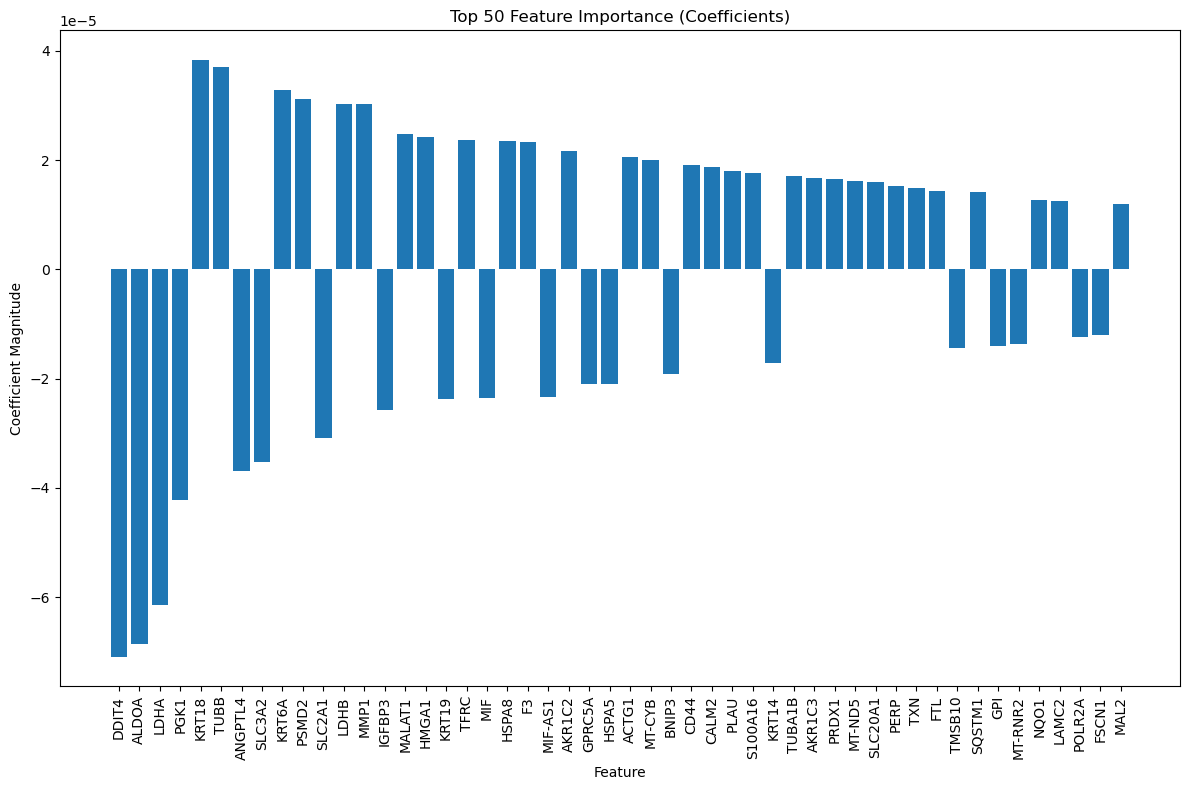

In [95]:
feature_names = X_train.columns.tolist()

# Check if the classifier is a linear SVM and has coefficients
if hasattr(best_svm, 'coef_'):
    # Get feature importances (coefficients)
    feature_importance = best_svm.coef_[0]
    
    # Sort feature importances in descending order
    sorted_indices = np.argsort(np.abs(feature_importance))[::-1]
    sorted_feature_importance = feature_importance[sorted_indices]
    
    # Plot top 50 feature importances
    top_n = 50
    plt.figure(figsize=(12, 8))
    plt.bar(range(top_n), sorted_feature_importance[:top_n], align='center')
    plt.xticks(range(top_n), [feature_names[i] for i in sorted_indices[:top_n]], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Coefficient Magnitude')
    plt.title('Top 50 Feature Importance (Coefficients)')
    plt.tight_layout()
    plt.show()


 In the context of binary classification with classes labeled as 0 and 1, a negative coefficient means that as the corresponding feature increases in value, the model is more likely to predict class 0 (negative class) rather than class 1 (positive class). 

In [110]:
import umap

# Reduce dimensionality of data to 3 dimensions using UMAP
umap_model = umap.UMAP(n_components=3)
X_train_3d_umap = umap_model.fit_transform(X_train)

# Train the SVM classifier on the reduced-dimensional data
best_svm_3d = SVC(C=0.01, gamma=1, kernel='linear', probability=True)
best_svm_3d.fit(X_train_3d_umap, y_train)

# Get the coefficients and intercept of the linear separator
coef = best_svm_3d.coef_
intercept = best_svm_3d.intercept_

# Define ranges for creating a smaller meshgrid
x_min, x_max = X_train_3d_umap[:, 0].min() - 1, X_train_3d_umap[:, 0].max() + 1
y_min, y_max = X_train_3d_umap[:, 1].min() - 1, X_train_3d_umap[:, 1].max() + 1
z_min, z_max = X_train_3d_umap[:, 2].min() - 1, X_train_3d_umap[:, 2].max() + 1

# Create a smaller meshgrid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

# Calculate corresponding z values for the linear separator
zz = (-coef[0, 0] * xx - coef[0, 1] * yy - intercept) / coef[0, 2]

# Create a 3D scatter plot for the data points
fig = px.scatter_3d(x=X_train_3d_umap[:, 0], y=X_train_3d_umap[:, 1], z=X_train_3d_umap[:, 2], color=y_train)

# Add decision boundary to the plot
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, showscale=False, opacity=0.5, colorscale='Blues'))

# Set axis labels
fig.update_layout(scene=dict(xaxis_title='UMAP Component 1',
                             yaxis_title='UMAP Component 2',
                             zaxis_title='UMAP Component 3'),
                  title='Decision Boundary and Linear Separator in 3D')

# Show the plot
fig.show()


In [115]:
import umap

# Reduce dimensionality of data to 2 dimensions using UMAP
umap_model = umap.UMAP(n_components=2)
X_train_2d_umap = umap_model.fit_transform(X_train)

# Train the SVM classifier on the reduced-dimensional data
best_svm_2d = SVC(C=0.01, gamma=1, kernel='linear', probability=True)
best_svm_2d.fit(X_train_2d_umap, y_train)

# Get the coefficients and intercept of the linear separator
coef = best_svm_2d.coef_[0]
intercept = best_svm_2d.intercept_[0]

# Define ranges for creating a smaller meshgrid
x_min, x_max = X_train_2d_umap[:, 0].min() - 1, X_train_2d_umap[:, 0].max() + 1
y_min, y_max = X_train_2d_umap[:, 1].min() - 1, X_train_2d_umap[:, 1].max() + 1

# Create a smaller meshgrid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Calculate corresponding z values for the linear separator
zz = (-coef[0] * xx - intercept) / coef[1]

# Predict the labels for each point in the meshgrid
Z = best_svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot for the data points
fig = px.scatter(x=X_train_2d_umap[:, 0], y=X_train_2d_umap[:, 1], color=y_train)

# Add contour plot for decision boundary to the plot
fig.add_contour(x=xx[0], y=yy[:, 0], z=Z, contours_coloring='lines', line_width=2, showscale=False)

# Annotate the contour plot with classification labels
for i in range(len(xx)):
    for j in range(len(yy)):
        x_text = xx[i, j]
        y_text = yy[i, j]
        class_label = "Class " + str(Z[i, j])
        fig.add_annotation(x=x_text, y=y_text, text=class_label, showarrow=False, font=dict(size=8))

# Set axis labels and title
fig.update_layout(xaxis_title='UMAP Component 1', yaxis_title='UMAP Component 2', title='Decision Boundary and Linear Separator with Classification Labels in 2D')

# Show the plot
fig.show()


KeyboardInterrupt: 